<img src="./images/Divvy_Logo.svg" alt="Drawing" align="left" style="width: 200px;"/>

# Chicago [Divvy](https://www.divvybikes.com/) Bicycle Sharing Data Analysis and Modeling

In this notebook, I conducted a series of exploratory data analysis and modeling on [Chicago Divvy bicycle sharing data](https://www.divvybikes.com/system-data). The goal of this project includes:

* Visualize the bicycle sharing data
* Try to find some interesting pheonona behind the data
* Try to model the bicycle needs behind the data

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os

from utils import query_weather, merge

%matplotlib inline

# Data Preprocessing

### Weather information

Among all the external information, weather has a huge influence on the usage of bicycle in Chicago. In this project, I first write a wrapper to download the weather information from [Weather Underground](https://www.wunderground.com/). 

In [2]:
# Query data in different years
keys = ['ac6a917d396d3bd0', '37c617f5f653f918', '7a60a4d9659f26ff', 
        'ccdd498e9a04cf55', '86c52e1a015baa55']
years = [2013, 2014, 2015, 2016, 2017]

for key, year in zip(keys, years):
    path = './data/weather_' + str(year) + '.csv'
    if os.path.isfile(path):
        continue
    df, _ = query_weather(key=key, year=year, state='IL', area='Chicago')
    df.to_csv(path, index=False)
    print('File saved:\t', path)

### Combine bicycle, station, and weather data

In [3]:
if not os.path.isfile('./data/data_raw.csv'):
    # year 2013
    # load weather information
    weather_2013 = pd.read_csv('./data/weather_2013.csv', parse_dates=['date'])
    trip_2013 = pd.read_csv('./data/2013/Divvy_Trips_2013.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2013 = pd.read_csv('./data/2013/Divvy_Stations_2013.csv')

    # merge information
    merged_2013 = merge(trip_2013, station_2013, weather_2013)

    # year 2014, Q1 and Q2
    # load weather information
    weather_2014 = pd.read_csv('./data/weather_2014.csv', parse_dates=['date'])

    trip_2014_Q1Q2 = pd.read_csv('./data/2014_Q1Q2/Divvy_Trips_2014_Q1Q2.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2014_Q1Q2 = pd.read_excel('./data/2014_Q1Q2/Divvy_Stations_2014-Q1Q2.xlsx')

    # merge information
    merged_2014_Q1Q2 = merge(trip_2014_Q1Q2, station_2014_Q1Q2, weather_2014)

    # year 2014, Q3 and Q4
    trip_2014_Q3_07 = pd.read_csv('./data/2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2014_Q3_0809 = pd.read_csv('./data/2014_Q3Q4/Divvy_Trips_2014-Q3-0809.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2014_Q4 = pd.read_csv('./data/2014_Q3Q4/Divvy_Trips_2014-Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2014_Q3Q4 = pd.read_csv('./data/2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv')

    # merge information
    merged_2014_Q3_07 = merge(trip_2014_Q3_07, station_2014_Q3Q4, weather_2014)
    merged_2014_Q3_0809 = merge(trip_2014_Q3_0809, station_2014_Q3Q4, weather_2014)
    merged_2014_Q4 = merge(trip_2014_Q4, station_2014_Q3Q4, weather_2014)

    # year 2015, Q1 and Q2
    # load weather information
    weather_2015 = pd.read_csv('./data/weather_2015.csv', parse_dates=['date'])

    trip_2015_Q1 = pd.read_csv('./data/2015_Q1Q2/Divvy_Trips_2015-Q1.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q2 = pd.read_csv('./data/2015_Q1Q2/Divvy_Trips_2015-Q2.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2015 = pd.read_csv('./data/2015_Q1Q2/Divvy_Stations_2015.csv')

    # merge information
    merged_2015_Q1 = merge(trip_2015_Q1, station_2015, weather_2015)
    merged_2015_Q2 = merge(trip_2015_Q2, station_2015, weather_2015)

    # year 2015, Q3 and Q4
    trip_2015_Q3_07 = pd.read_csv('./data/2015_Q3Q4/Divvy_Trips_2015_07.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q3_08 = pd.read_csv('./data/2015_Q3Q4/Divvy_Trips_2015_08.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q3_09 = pd.read_csv('./data/2015_Q3Q4/Divvy_Trips_2015_09.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2015_Q4 = pd.read_csv('./data/2015_Q3Q4/Divvy_Trips_2015_Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])

    # merge information
    merged_2015_Q3_07 = merge(trip_2015_Q3_07, station_2015, weather_2015)
    merged_2015_Q3_08 = merge(trip_2015_Q3_08, station_2015, weather_2015)
    merged_2015_Q3_09 = merge(trip_2015_Q3_09, station_2015, weather_2015)
    merged_2015_Q4 = merge(trip_2015_Q4, station_2015, weather_2015)

    # year 2016, Q1 and Q2
    # load weather information
    weather_2016 = pd.read_csv('./data/weather_2016.csv', parse_dates=['date'])

    trip_2016_Q1 = pd.read_csv('./data/2016_Q1Q2/Divvy_Trips_2016_Q1.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_Q2_04 = pd.read_csv('./data/2016_Q1Q2/Divvy_Trips_2016_04.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_Q2_05 = pd.read_csv('./data/2016_Q1Q2/Divvy_Trips_2016_05.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    trip_2016_Q2_06 = pd.read_csv('./data/2016_Q1Q2/Divvy_Trips_2016_06.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2016_Q1Q2 = pd.read_csv('./data/2016_Q1Q2/Divvy_Stations_2016_Q1Q2.csv')

    # merge information
    merged_2016_Q1 = merge(trip_2016_Q1, station_2016_Q1Q2, weather_2016)
    merged_2016_Q2_04 = merge(trip_2016_Q2_04, station_2016_Q1Q2, weather_2016)
    merged_2016_Q2_05 = merge(trip_2016_Q2_05, station_2016_Q1Q2, weather_2016)
    merged_2016_Q2_06 = merge(trip_2016_Q2_06, station_2016_Q1Q2, weather_2016)

    # year 2016, Q3 and Q4
    trip_2016_Q3 = pd.read_csv('./data/2016_Q3Q4/Divvy_Trips_2016_Q3.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2016_Q3 = pd.read_csv('./data/2016_Q3Q4/Divvy_Stations_2016_Q3.csv')

    trip_2016_Q4 = pd.read_csv('./data/2016_Q3Q4/Divvy_Trips_2016_Q4.csv', low_memory=False, 
                            parse_dates=['starttime', 'stoptime'])
    station_2016_Q4 = pd.read_csv('./data/2016_Q3Q4/Divvy_Stations_2016_Q4.csv')

    # merge information
    merged_2016_Q3 = merge(trip_2016_Q3, station_2016_Q3, weather_2016)
    merged_2016_Q4 = merge(trip_2016_Q4, station_2016_Q4, weather_2016)

    # year 2017, Q1 and Q2
    # load weather information
    weather_2017 = pd.read_csv('./data/weather_2017.csv', parse_dates=['date'])

    trip_2017_Q1 = pd.read_csv('./data/2017_Q1Q2/Divvy_Trips_2017_Q1.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q1.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)

    trip_2017_Q2 = pd.read_csv('./data/2017_Q1Q2/Divvy_Trips_2017_Q2.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q2.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)

    station_2017_Q1Q2 = pd.read_csv('./data/2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv')

    # merge information
    merged_2017_Q1 = merge(trip_2017_Q1, station_2017_Q1Q2, weather_2017)
    merged_2017_Q2 = merge(trip_2017_Q2, station_2017_Q1Q2, weather_2017)

    # year 2017, Q3 and Q4
    trip_2017_Q3 = pd.read_csv('./data/2017_Q3Q4/Divvy_Trips_2017_Q3.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q3.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)

    trip_2017_Q4 = pd.read_csv('./data/2017_Q3Q4/Divvy_Trips_2017_Q4.csv', low_memory=False, 
                            parse_dates=['start_time', 'end_time'])
    trip_2017_Q4.rename(columns={'start_time': 'starttime', 'end_time': 'stoptime'}, inplace=True)

    station_2017_Q3Q4 = pd.read_csv('./data/2017_Q3Q4/Divvy_Stations_2017_Q3Q4.csv')

    # merge information
    merged_2017_Q3 = merge(trip_2017_Q3, station_2017_Q3Q4, weather_2017)
    merged_2017_Q4 = merge(trip_2017_Q4, station_2017_Q3Q4, weather_2017)
    
    # concatenate and save the merged data
    objs = [merged_2013, merged_2014_Q1Q2, merged_2014_Q3_07, merged_2014_Q3_0809, merged_2014_Q4, 
            merged_2015_Q1, merged_2015_Q2, merged_2015_Q3_07, merged_2015_Q3_08, merged_2015_Q3_09, 
            merged_2015_Q4, merged_2016_Q1, merged_2016_Q2_04, merged_2016_Q2_05, merged_2016_Q2_06, 
            merged_2016_Q3, merged_2016_Q4, merged_2017_Q1, merged_2017_Q2, merged_2017_Q3, merged_2017_Q4]
    data = pd.concat(objs, axis=0)
    data.to_csv('./data/data_raw.csv', index=False)
    _ = gc.collect()

### Clean the data
* Exclude trip duration that is less than 2 minutes and more than 1 hour
* Exclude trip with missing latitude_start, longitude_start, dpcapacity_start, latitude_end, longitude_end, dpcapacity_end
* Exclude trip without gender information
* Extract year, month, and day information
* Keep useful weather information

In [5]:
# read data from ./data/
if not os.path.isfile('./data/data.csv'):
    data_raw = pd.read_csv('./data/data_raw.csv', parse_dates=['starttime', 'stoptime'])
    data = data_raw[(data_raw['tripduration'] >= 120) & (data_raw['tripduration'] <= 3600)]
    data = data[~data['latitude_start'].isnull()]
    data = data[~data['latitude_end'].isnull()]
    data = data[~data['gender'].isnull()]
    data = data[~data['humidity'].isnull()]
    
    # extract detailed time information
    date = np.array(list(map(lambda x: (x.year, x.month, x.week, x.dayofweek, x.hour), data['starttime'])))
    data['year'] = date[:, 0]
    data['month'] = date[:, 1]
    data['week'] = date[:, 2]
    data['day'] = date[:, 3]
    data['hour'] = date[:, 4]
    data = data[data['year'] > 2013]
    
    # transform trip duration into minutes
    data['tripduration'] = data['tripduration'] / 60.0
    
    # extract the weather events information
    def events_map(event):
        maps = {'tstorms': 'tstorms', 'rain': 'rain or snow', 'cloudy': 'cloudy', 'unknown': 'unknown', 
                'mostlycloudy': 'cloudy', 'partlycloudy': 'cloudy', 'clear': 'clear', 'hazy': 'not clear',
                'fog': 'not clear', 'snow': 'rain or snow', 'sleet': 'rain or snow'}
        return maps[event]
    
    data['events'] = list(map(events_map, data['events']))

    # save used informaiton
    columns = ['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender', 'starttime', 
               'stoptime', 'tripduration', 'temperature', 'events', 'from_station_id', 'from_station_name', 
               'latitude_start', 'longitude_start', 'dpcapacity_start', 'to_station_id', 'to_station_name',
               'latitude_end', 'longitude_end', 'dpcapacity_end']
    data.to_csv('./data/data.csv', columns=columns, index=False)
    _ = gc.collect()

# read the clean dataset
data = pd.read_csv('./data/data.csv')

In [7]:
data.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [24]:
data.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

# Visualization and Analysis

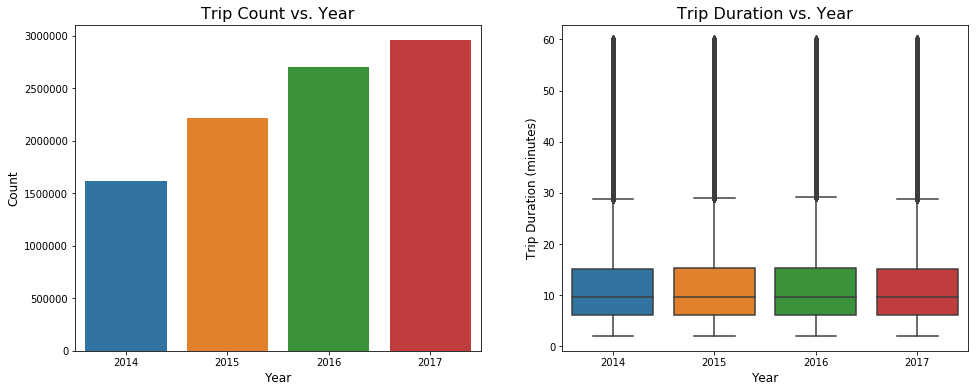

In [25]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='year', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='year', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

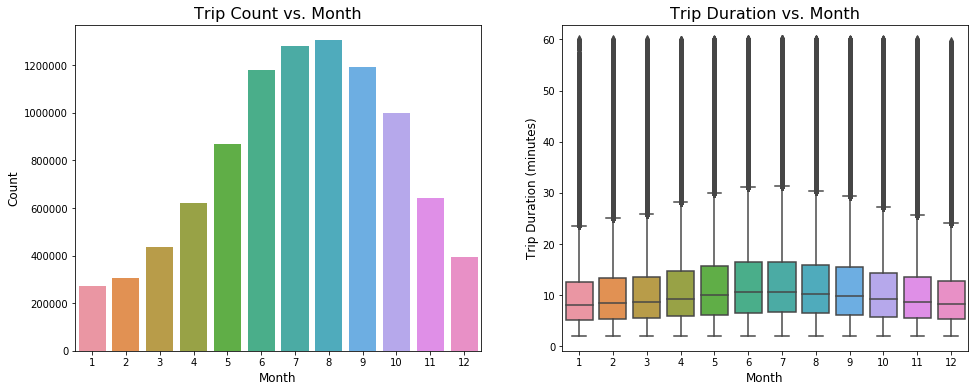

In [26]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

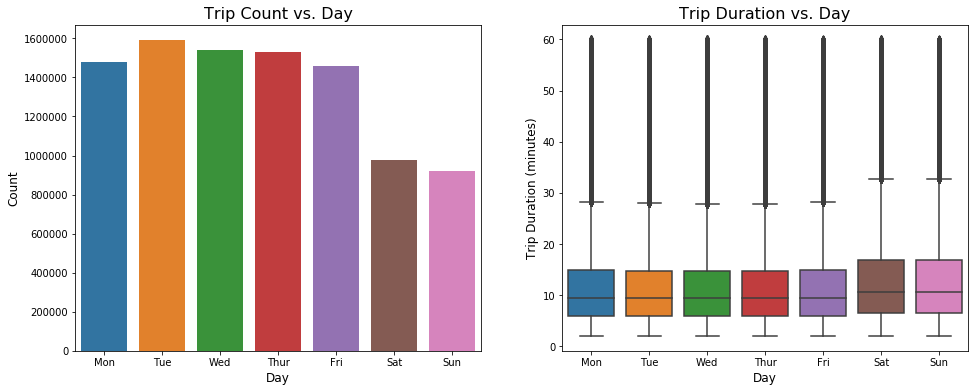

In [27]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='day', data=data, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='day', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

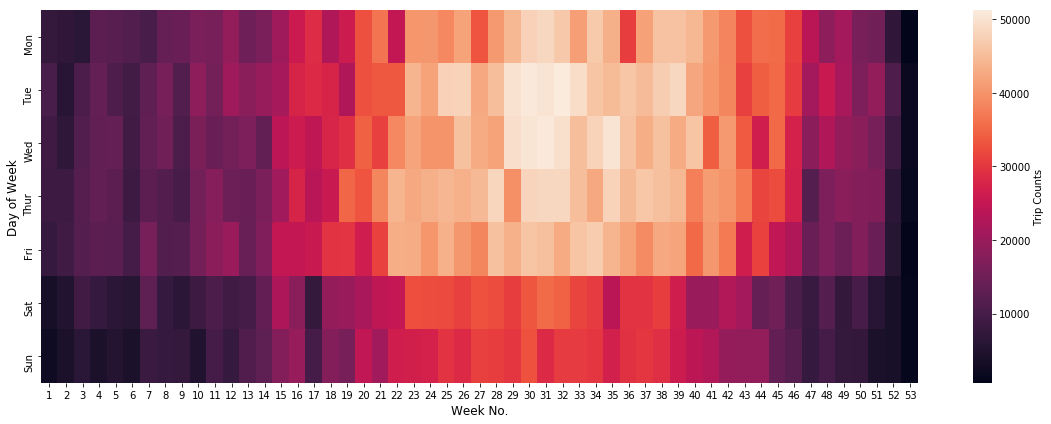

In [126]:
# heatmap of trip count vs. (weekday and week no.)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = data[['day', 'week', 'tripduration']].groupby(['day', 'week']).count().reset_index()
pivots = tmp.pivot('day', 'week', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_xlabel('Week No.', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

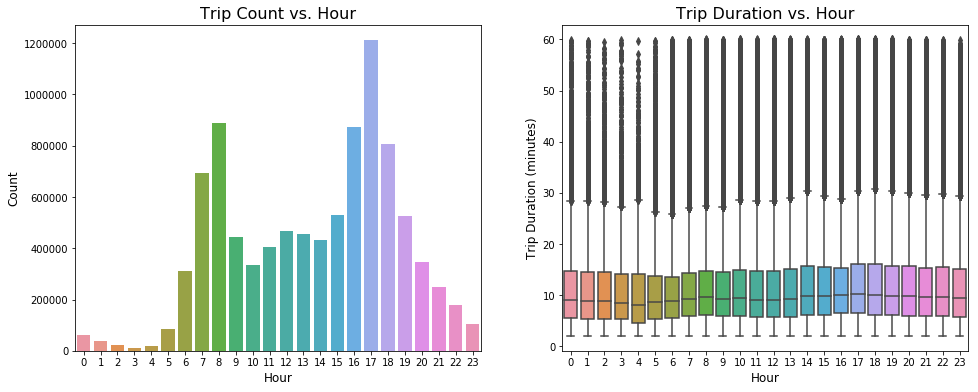

In [28]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='hour', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Hour', fontsize=16)
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='hour', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

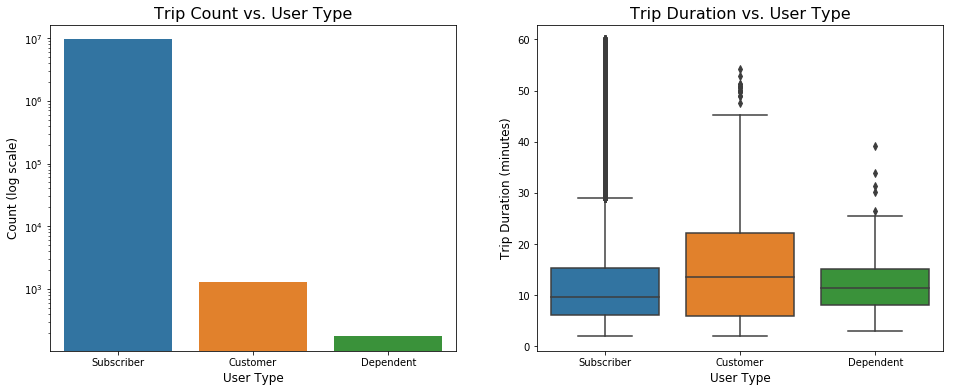

In [29]:
# Trip distribution
# Subscriber: Annual Membership
# Cumtomer: 24-hour pass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='usertype', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='usertype', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. User Type', fontsize=16)
ax[1].set_xlabel('User Type', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

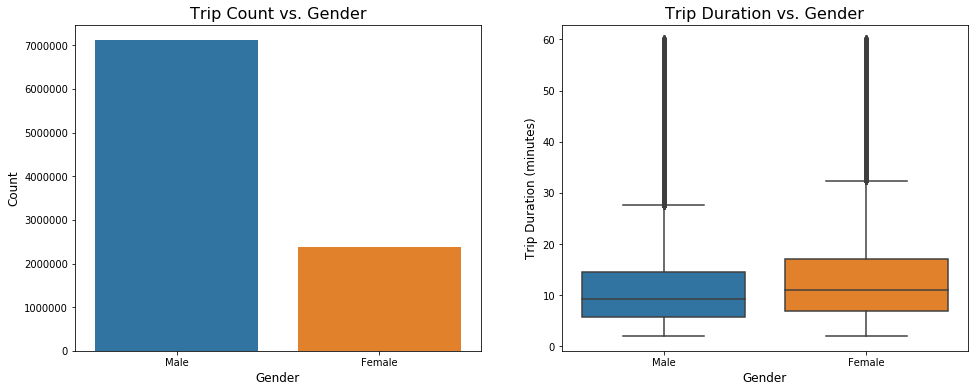

In [30]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='gender', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Gender', fontsize=16)
ax[0].set_xlabel('Gender', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='gender', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Gender', fontsize=16)
ax[1].set_xlabel('Gender', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

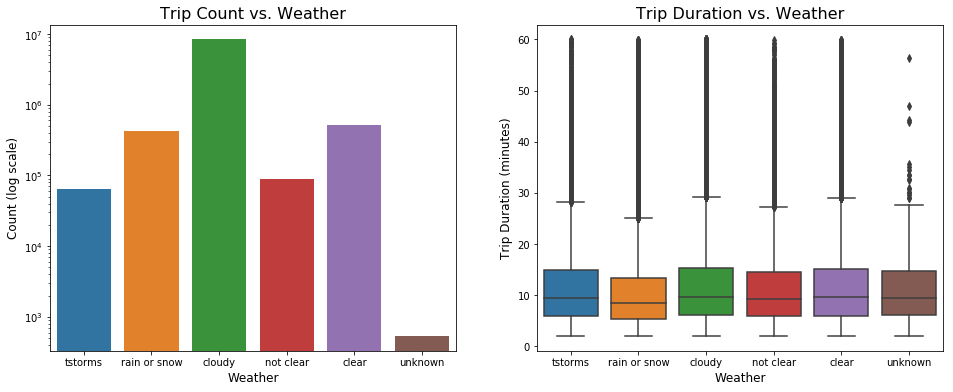

In [31]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='events', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. Weather', fontsize=16)
ax[0].set_xlabel('Weather', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='events', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Weather', fontsize=16)
ax[1].set_xlabel('Weather', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

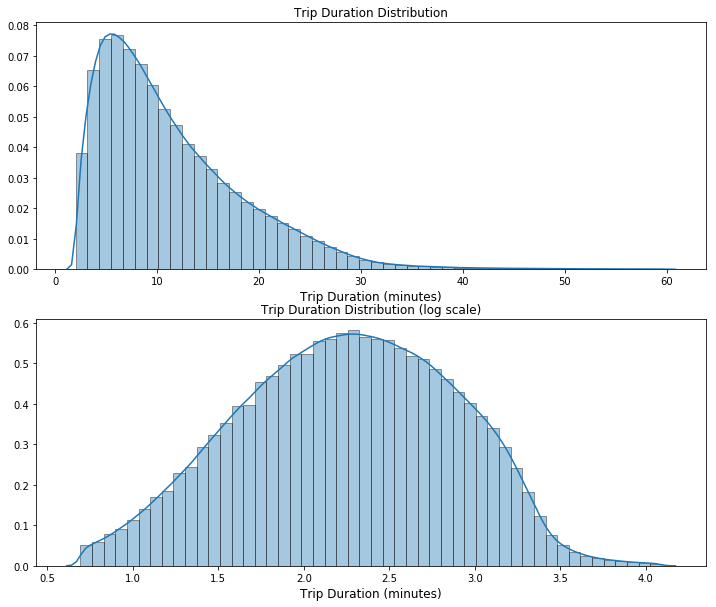

In [107]:
# Trip distribution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(data['tripduration'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(data['tripduration']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

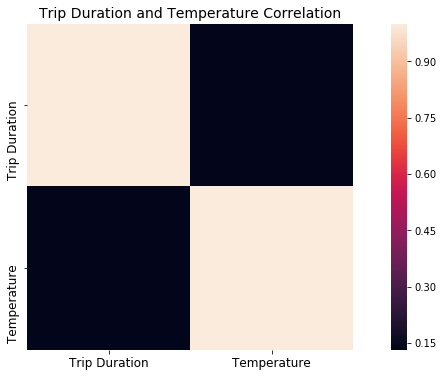

In [154]:
# trip duration vs. temperature
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[['tripduration', 'temperature']].corr())
ax.set_xticklabels(labels=['Trip Duration', 'Temperature'], fontsize=12)
ax.set_yticklabels(labels=['Trip Duration', 'Temperature'], fontsize=12)
ax.set_title('Trip Duration and Temperature Correlation', fontsize=14)
plt.axis('image')
plt.show()

# Data Modeling

In [50]:
data.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

## Trip start and stop stations

## Bicycle usage modeling

# What's Next?

### Fixed stations vs. Station-less, which one is better?


| Divvy Bicycle              | China ofo / Mobike         |
|----------------------------|----------------------------|
| Fixed stations             | Station-less               |
| Easy to manage             | Hard to manage             |
| Easy to track              | Hard to track single user  |
| High cost                  | Low cost                   |